# ML With Tree Based Models

# Chapter 1- Classification and Regression Trees

## `A-`  Classification-tree

- Given a labeled dataset, a classification tree learns a sequence of if-else questions about individual features in order to infer the labels. 
- In contrast to linear models, trees are able to capture non-linear relationships between features and labels. 
- In addition, trees don't require the features to be on the same scale through standardization for example. 

#### Example: (Breast Cancer Dataset in 2D)

We'll try to predict whether a tumor is malignant or benign in the Wisconsin Breast Cancer dataset using only 2 features. The figure here shows a scatterplot of two cancerous cell features with malignant-tumors in blue and benign-tumors in red. 

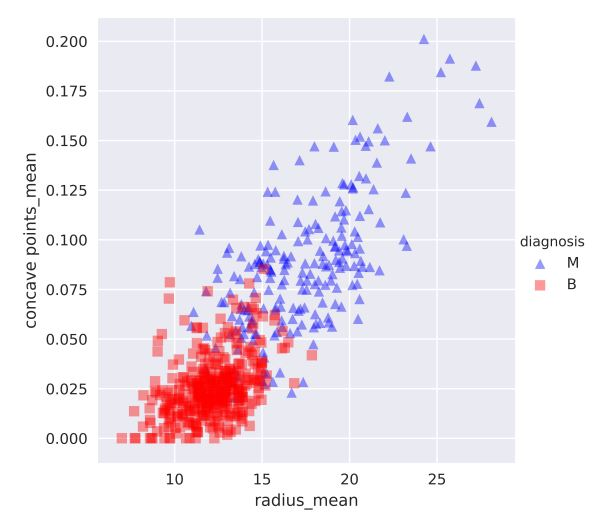

#### Decision-tree Diagram

When a classification tree is trained on this dataset, the tree learns a sequence of if-else questions with each question involving one feature and one split-point. Take a look at the tree diagram here. 
   - At the top, the tree asks whether the concave-points mean of an instance is <= 0.051. If it is, the instance traverses the True branch; otherwise, it traverses the False branch. 
   - Similarly, the instance keeps traversing the internal branches until it reaches an end. 
   - The label of the instance is then predicted to be that of the prevailing class at that end.
   - The maximum number of branches separating the top from an extreme-end is known as the maximum depth which is equal to 2 here. 

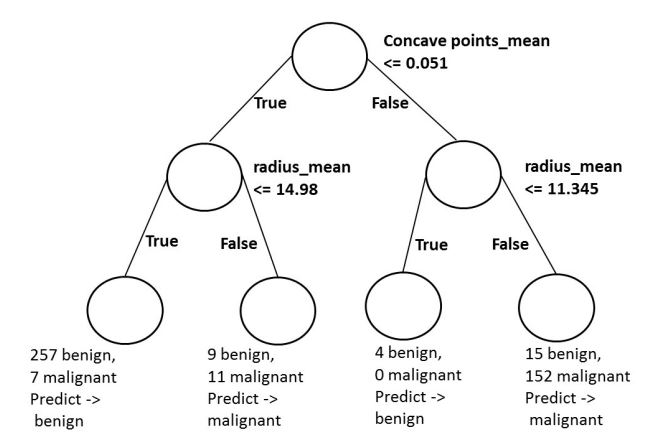

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Dataset/cancer_data.csv')

In [2]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.drop('Unnamed: 32', axis= 1, inplace = True)

In [5]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

In [7]:
X = df[['concave points_mean','radius_mean']]
y = df['diagnosis']

In [8]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,stratify=y,random_state=1)
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train,y_train)
# Predict the test set labels
y_pred = dt.predict(X_test)
# Evaluate the test-set accuracy
accuracy_score(y_test, y_pred)

0.8859649122807017

#### Decision Regions

A classification-model divides the feature-space into regions where all instances in one region are assigned to only one class-label. These regions are known as decision-regions. 

Decision-regions are separated by surfaces called decision-boundaries. The figure here shows the decision-regions of a linear-classifier. Note how the boundary is a straight-line.

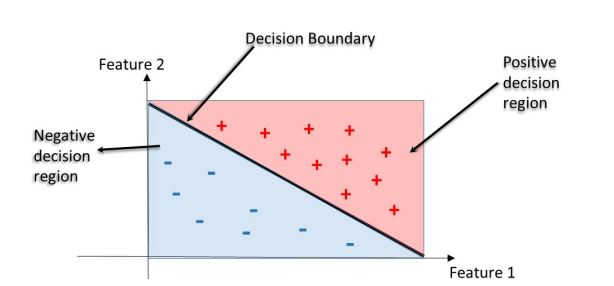

#### Decision Regions: CART vs. Linear Model

In contrast, as shown here on the right, a classification-tree produces rectangular decision-regions in the feature-space. This happens because at each split made by the tree, only one feature is involved. 

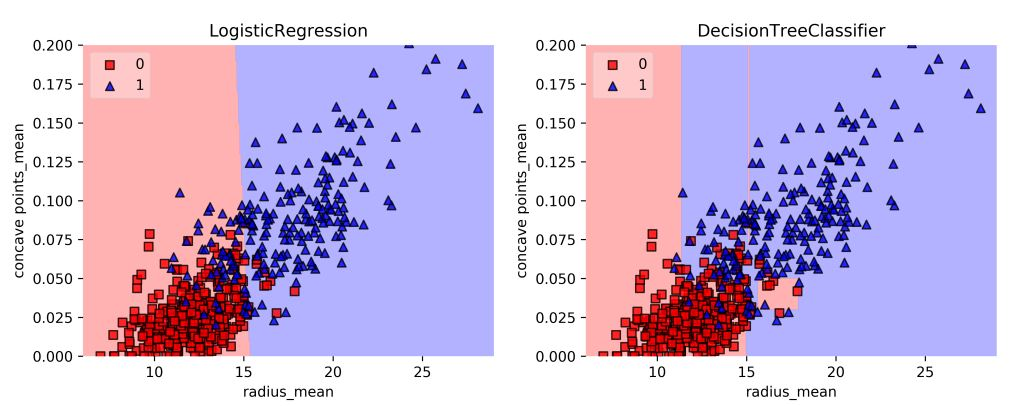

## `B-` Building Blocks of a Decision-Tree

**Decision-tree** is a data-structure consisting of a hierarchy of individual units called nodes.

**Node** is a point that involves either a question or a prediction. 

We have three kinds of nodes:

**Root** 
- is the node at which the decision-tree starts growing. 
- It has no parent node and involves a question that gives rise to 2 children nodes through two branches. 

**internal** 
- is a node that has a parent. 
- It also involves a question that gives rise to 2 children nodes.

**Leaf**
- is a node that has no children
- It has one parent node and involves no questions. It's where a prediction is made. 

Recall that when a classification tree is trained on a labeled dataset, the tree learns patterns from the features in such a way to produce the purest leafs. 

In other words the tree is trained in such a way so that, in each leaf, one class-label is predominant. 

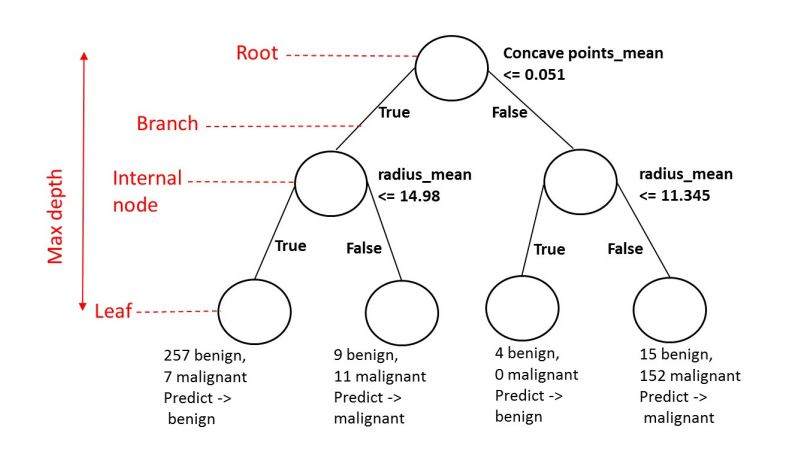

#### How Prediction Work

In the tree diagram shown here, consider the case where an instance traverses the tree to reach the leaf on the left. 

In this leaf, there are 257 instances classified as benign and 7 instances classified as malignant. As a result, the tree's prediction for this instance would be: 'benign'. In order to understand how a classification tree produces the purest leafs possible, let's first define the concept of information gain. 

#### Information Gain (IG)

- The nodes of a classification tree are grown recursively; in other words, the obtention of an internal node or a leaf depends on the state of its predecessors. 
- To produce the purest leafs possible, at each node, a tree asks a question involving **one feature (f)** and a **split-point (sp)**. 
- But how does it know which feature and which split-point to pick? 
- It does so by maximizing Information gain! 
- The tree considers that every node contains information and aims at maximizing the Information Gain obtained after each split. 
- Consider the case where a node with N samples is split into a left-node with Nleft samples and a right-node with Nright samples. 

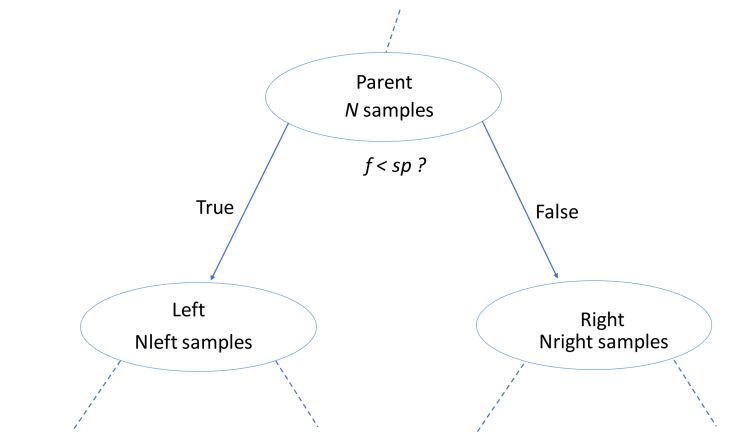

The information gain for such split is given by the formula shown here.

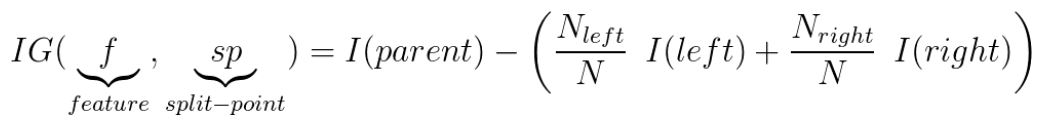

- A question that you may have in mind here is: 'What criterion is used to measure the impurity of a node?' 

- Well, there are different criteria you can use among which are the 
  - gini-index
  - entropy. 

#### Classification-Tree Learning

When an unconstrained tree is trained

- Nodes are grown recursively. In other words, a node exists based on the state of its predecessors. 
- At a non-leaf node, the data is split based on 
    -  Feature (f) and split-point (sp) in such a way to maximize information gain (IG). 
- If the information gain obtained by splitting a node is null, the node is declared a leaf. 

If you constrain the maximum depth of a tree to 2 for example, all nodes having a depth of 2 will be declared leafs even if the information gain obtained by splitting such nodes is not null. 

Revisiting the 2D breast-cancer dataset from the previous lesson, you can set the information criterion of dt to the gini-index by setting the criterion parameter to 'gini' 

In [9]:
# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,stratify=y,random_state=1)
# Instantiate dt
dt = DecisionTreeClassifier(criterion='gini', random_state=1)

# Fit dt to the training set
dt.fit(X_train,y_train)
# Predict the test set labels
y_pred = dt.predict(X_test)
# Evaluate the test-set accuracy
accuracy_score(y_test, y_pred)

0.9122807017543859

#### Using entropy as a criterion

In [10]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion ='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

#### Entropy vs Gini index

In [11]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier( max_depth=8, criterion ='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [12]:
# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Use dt_gini to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')

Accuracy achieved by using entropy: 0.886
Accuracy achieved by using the gini index: 0.921


# `C-` Decision tree for regression

 Recall that in regression, the target variable is continuous. In other words, the output of your model is a real value. 

We will ise dataset of the automobile miles-per-gallon dataset from the UCI Machine Learning Repository. This dataset consists of 6 features corresponding to the characteristics of a car and a continuous target variable labeled mpg which stands for miles-per-gallon. 

Our task is to predict the mpg consumption of a car given these six features. To simplify the problem, here the analysis is restricted to only one feature corresponding to the displacement of a car. This feature is denoted by displ. 

In [13]:
auto = pd.read_csv('Dataset/auto.csv')

In [14]:
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


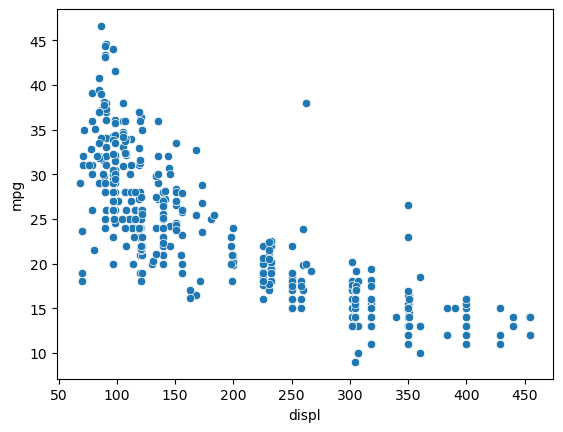

In [15]:
sns.scatterplot(data = auto , x= 'displ', y = 'mpg');

A 2D scatter plot of mpg versus displ shows that the mpg-consumption decreases nonlinearly with displacement. 

**Note** that linear models such as linear regression would not be able to capture such a non-linear trend. Let's see how you can train a decision tree with scikit-learn to solve this regression problem. 

In [16]:
X = auto.drop(['mpg', 'origin'], axis = 1)
y = auto['mpg']

In [17]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=3)

# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf=0.1, #to impose a stopping condition in which each 
                                                #leaf has to contain at least 10% of the training data. 
                           random_state=3)

In [18]:
# Fit 'dt' to the training-set
dt.fit(X_train, y_train)
# Predict test-set labels
y_pred = dt.predict(X_test)
# Compute test-set MSE
mse_dt = MSE(y_test, y_pred)
# Compute test-set RMSE
rmse_dt = mse_dt**(1/2)
# Print rmse_dt
print(rmse_dt)

4.3040022996986975


#### Information Criterion for Regression-Tree

Here, it's important to note that, when a regression tree is trained on a dataset, the impurity of a node is measured using the mean-squared error of the targets in that node. 

This means that the regression tree tries to find the splits that produce leafs where in each leaf the target values are on average, the closest possible to the mean-value of the labels in that particular leaf. 

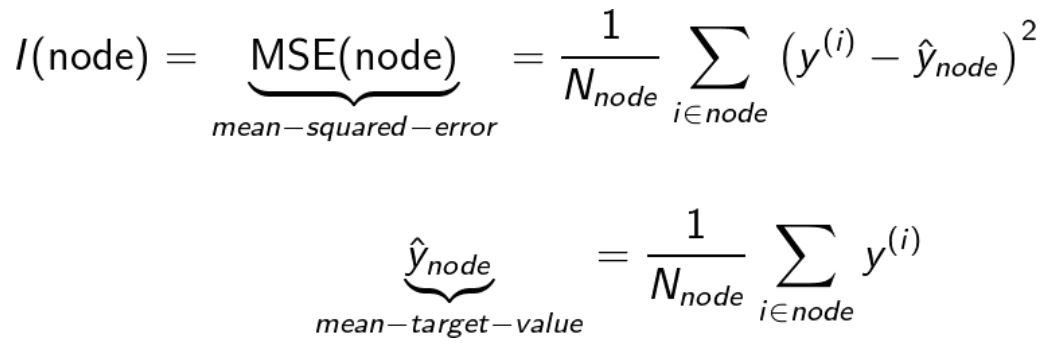

#### Linear Regression vs. Regression-Tree

To highlight the importance of the flexibility of regression trees, take a look at this figure. On the left we have a scatter plot of the data in blue along with the predictions of a linear regression model shown in black. 

The linear model fails to capture the non-linear trend exhibited by the data. On the right, we have the same scatter plot along with a red line corresponding to the predictions of the regression tree that you trained earlier. The regression tree shows a greater flexibility and is able to capture the non-linearity, though not fully.  

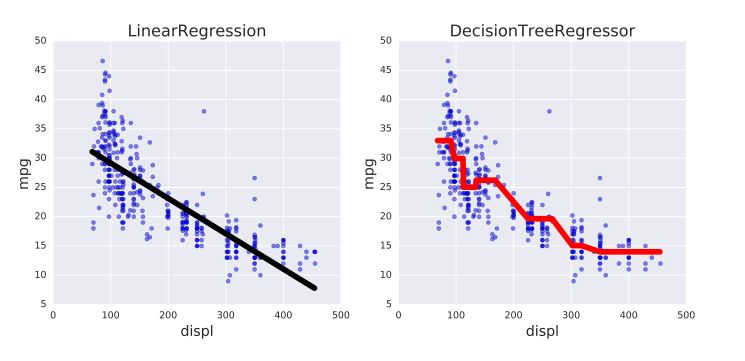

# Chapter 2- The Bias-Variance Tradeoff

# `A- ` Generalization Error

In supervised learning, you make the assumption that there's a mapping f between features and labels. 

You can express this as **y=f(x)**. f which is shown in red here is an unknown function that you want to determine. In reality, data generation is always accompanied with randomness or noise like the blue points shown here. 

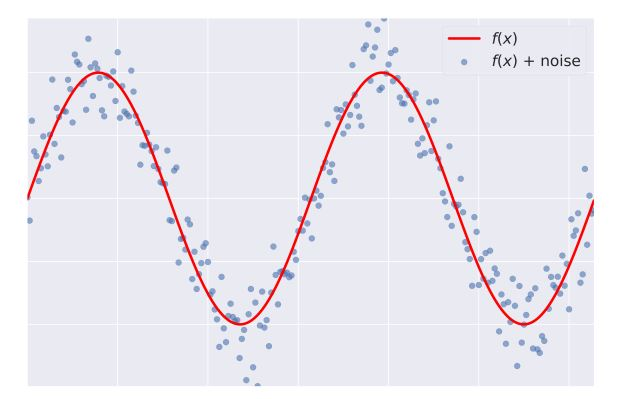

- Your goal is to find a model f^ that best approximates f. When f^ ~ f 
- f^ can be Logistic Regression, Decision Tree, Neural Network, ....
- you want to make sure that noise is discarded as much as possible. 

At the end, fhat should achieve a low predictive error on unseen datasets. 

#### Difficulties in Approximating $f$

**A) overfitting**, it's when f^ fits the noise in the training set. 

**B) underfitting**, it's when f^ is not flexible enough to approximate f. 

The generalization error of a model tells you how much it generalizes on unseen data. 

It can be decomposed into 3 terms: bias, variance and irreducible error where the irreducible error is the error contribution of noise. 

$f$ = biase*2 + Variance + irreducible_error

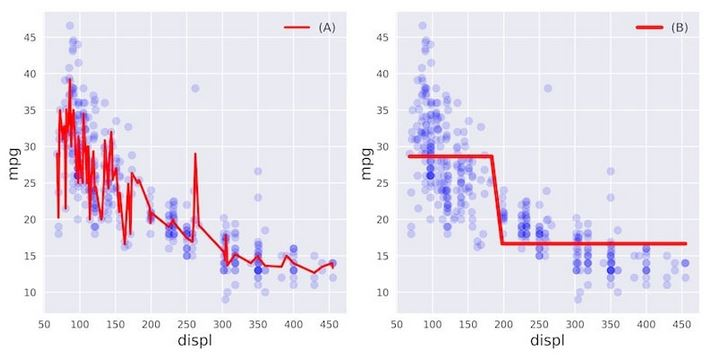

**Bias:** error term that tells you on average how much f^ not equal f (High bias models lead to underfitting)

**Variance** tells you how much f^ is inconsistent over different training sets (High variance models lead to overfitting)
   - f^ follows the training data points so closely that it misses the true function f shown in red.  

#### Model Complexity

- The complexity of a model sets its flexibility to approximate the true function f. 
- For example: increasing the maximum-tree-depth increases the complexity of a decision tree. 

#### Bias-Variance Tradeoff

The diagram here shows how the best model complexity corresponds to the lowest generalization error. 
- When the model complexity increases, the variance increases while the bias decreases. 
- Conversely, when model complexity decreases, variance decreases and bias increases. 

Your goal is to find the model complexity that achieves the lowest generalization error. Since this error is the sum of three terms with the irreducible error being constant, you need to find a balance between bias and variance because as one increases the other decreases. This is known as the bias-variance trade-off. 

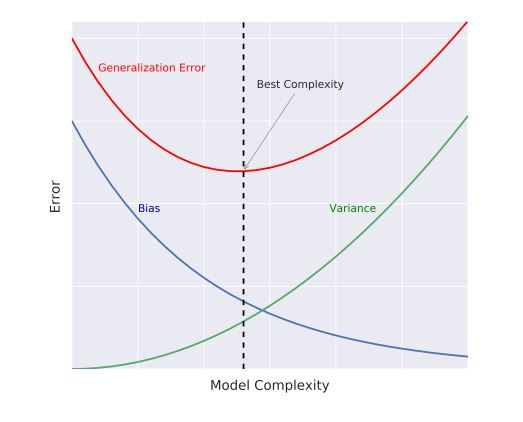

Visually, you can imagine approximating f^ as aiming at the center of a shooting-target where the center is the true function f. 
- If f^ is low bias and low variance, your shots will be closely clustered around the center. 
- If f^ is high variance and high bias, not only will your shots miss the target but they would also be spread all around the shooting target. 

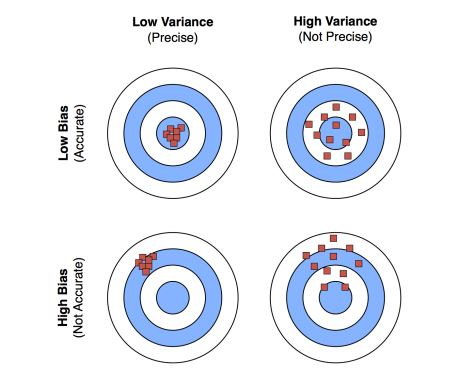

## `B-` Diagnose bias and variance problems

How do you estimate the generalization error of a model? 

This cannot be done directly because: 
- $f$ is unknown, 
- usually you only have one dataset, 
- you don't have access to the error term due to noise. 

**solution** 
- first split the data into a training and test set. 
- The model $f$^ can then be fit to the training set. 
- Its error can be evaluated on the test set
- The generalization error of $f$^ is roughly approximated by $f$^'s error on the test set. 

#### Better Model Evaluation with Cross-Validation

- Usually, the test set should be kept untouched until one is confident about $f$^ performance. 
- It should only be used to evaluate $f$^ final performance or error. 
- Now, evaluating $f$^ performance on the training set may produce an optimistic estimation of the error because $f$^ was already exposed to the training set when it was fit. 
- To obtain a reliable estimate of $f$^ performance, you should use a technique called cross-validation or CV. 
- CV can be performed using 
    - K-Fold-CV or 
    - hold-out-CV 

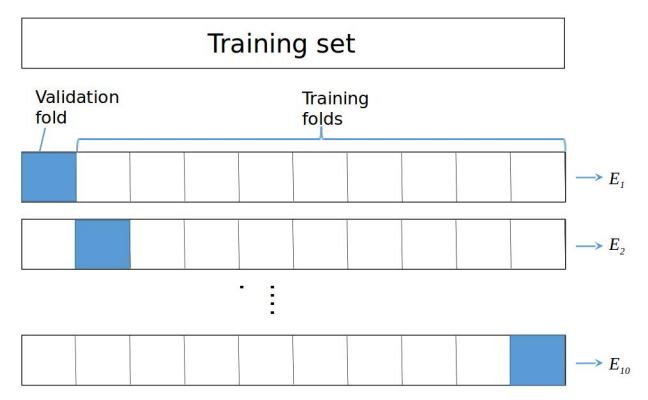

The diagram here illustrates this technique for K=10: 
- First, the training set (T) is split randomly into 10 partitions or folds, 
- The error of $f$^ is evaluated 10 times on the 10 folds, 
- Each time, one fold is picked for evaluation after training fhat on the other 9 folds. 
- At the end, you'll obtain a list of 10 errors.

Finally, the CV-error is computed as the mean of the 10 obtained errors. 

#### Diagnose Variance Problems

Once you have computed $f$^ cross-validation-error, you can check 
- if $f$^ cross-validation-error > $f$^ training set error.  **$f$^ is said to suffer from high variance.** (Model has overfitting)

To remedy this, try decreasing $f$^ complexity. 

For example, in a decision tree you can 
- Reduce the maximum-tree-depth.
- Increase the maximum-samples-per-leaf.
- You may also gather more data to train fhat. 

#### Diagnose Bias Problems

On the other hand  

- if $f$^ cross-validation-error is roughly equal to the training error but much greater than >> the desired error. **$f$^ is said to suffer from high bias** (Model has underfitting). 

To remedy this try increasing the model's complexity 

For example, in a decision tree you can 

- Increase the maximum-tree-depth.
- Decrease the maximum-samples-per-leaf.
- Gather more relevant features. 

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
# Set seed for reproducibility
SEED = 123
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)

# Instantiate decision tree regressor and assign it to 'dt'
dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf=0.14,
                           random_state=SEED)
                           

In [20]:
# Evaluate the list of MSE ontained by 10-fold CV
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV = - cross_val_score(dt, X_train, y_train, 
                           cv= 10,
                           scoring='neg_mean_squared_error',#to compute the negative-mean-squared-errors. 
                           n_jobs = -1)#to exploit all available CPUs in computation.

# Fit 'dt' to the training set
dt.fit(X_train, y_train)

# Predict the labels of training set
y_predict_train = dt.predict(X_train)

# Predict the labels of test set
y_predict_test = dt.predict(X_test)


In [21]:
# CV MSE
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))

# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))

# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))

CV MSE: 20.51
Train MSE: 15.30
Test MSE: 20.92


Given that the training set error is smaller than the CV-error, we can deduce that dt overfits the training set and that it suffers from high variance. 

Notice how the CV and test set errors are roughly equal. 

## `C-` Ensemble Learning

#### Advantages of CARTs (Classification and Regression Trees)

- Easy to understand and 
- Simple to interpret their output. 
- Easy to use and 
- Their flexibility gives them an ability to describe nonlinear dependencies between features and labels.
- Preprocessing: no need to standardize or normalize features before feeding them to a CART. 

#### Limitations of CARTs

- A classification tree for example, is only able to produce orthogonal decision boundaries. 
- Very sensitive to small variations in the training set. Sometimes, when a single point is removed from the training set, a CART's learned parameters may changed drastically. 
- Suffer from high variance when they are trained without constraints. In such case, they may overfit the training set.

A solution that takes advantage of the flexibility of CARTs while reducing their tendency to memorize noise is **ensemble learning.**

### Ensemble Learning

Ensemble learning can be summarized as follows: 
  - As a first step, different models are trained on the same dataset. 
  - Each model makes its own predictions. 
  - A meta-model then aggregates the predictions of individual models and outputs a final prediction. 
  - The final prediction is more robust and less prone to errors than each individual model. 
  - The best results are obtained when the models are skillful but in different ways
  
If some models make predictions that are way off, the other models should compensate these errors. In such case, the meta-model's predictions are more robust. 

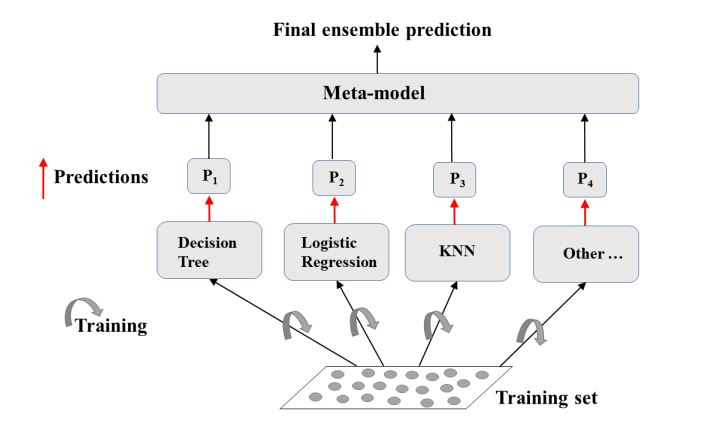

visually understand how ensemble learning works for a classification problem. 

- First, the training set is fed to different classifiers.
- Each classifier learns its parameters and makes predictions. 
- Then these predictions are fed to a meta model which aggregates them and outputs a final prediction. 

### Ensemble Learning in Practice: Voting Classifier

- The ensemble here consists of N classifiers making the predictions P0,P1,to,PN with P= 0 or 1. 
- The meta model outputs the final prediction by hard voting.

To understand hard voting, 
- Consider a voting classifier that consists of 3 trained classifiers as shown in the diagram here. 
- While classifiers 1 and 3 predict the label of 1 for a new data-point, classifier 2 predicts the label 0. 
- In this case, 1 has 2 votes while 0 has 1 vote. As a result, the voting classifier predicts 1. 

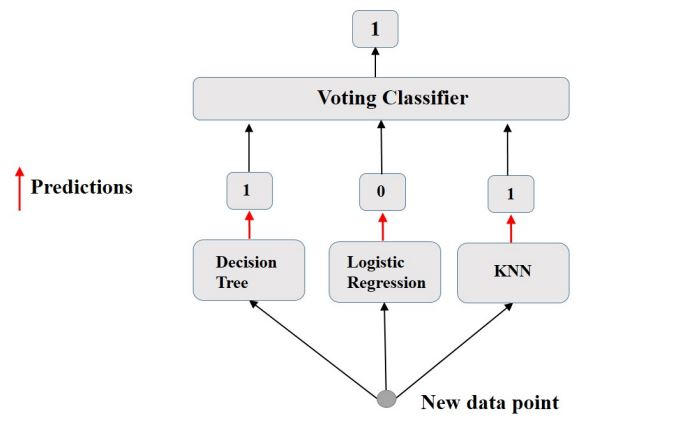

In [22]:
# Import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# Set seed for reproducibility
SEED = 1

In [23]:
X = df.drop('diagnosis', axis =1)
y = df['diagnosis']

In [24]:
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.3,random_state= SEED)

# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier( random_state=SEED)

# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
                ('K Nearest Neighbours', knn),
                ('Classification Tree', dt)]

In [25]:
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:

    #fit clf to the training set
    clf.fit(X_train, y_train)
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

C:\Users\AHamdan\anaconda3\envs\fatma\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression : 0.924
K Nearest Neighbours : 0.766
Classification Tree : 0.930


In [26]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Voting Classifier: 0.936


C:\Users\AHamdan\anaconda3\envs\fatma\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


This accuracy is higher than that achieved by any of the individual models in the ensemble. 

# Chapter 3- Bagging and Random Forests

## `A-` Bagging
Bagging is an another ensemble method also known as Bootstrap aggregation 

In Bagging, the ensemble is formed by models that use the same training algorithm. However, these models are not trained on the entire training set. Instead, each model is trained on a different subset of the data. 

- Bagging: stands for Bootstrap Aggregation.
- Uses a technique known as the bootstrap.
- Reduces variance of individual models in the ensemble

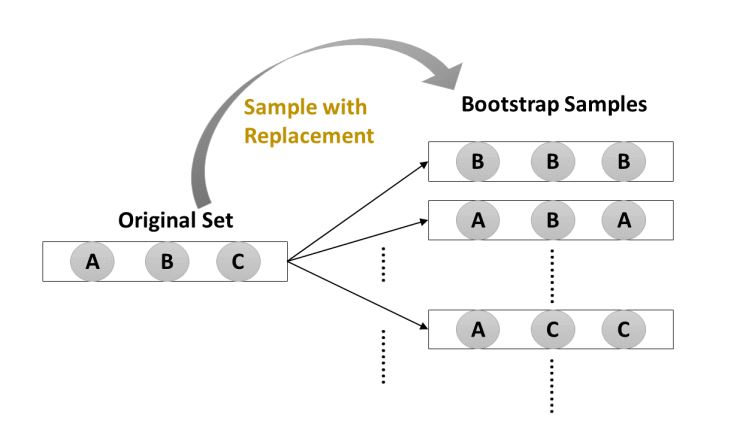

- In above  case where you have 3 balls labeled A, B, and C. 
- A bootstrap sample is a sample drawn from this with replacement. 
- By replacement, we mean that any ball can be drawn many times. 
- For example, 
    - in the first bootstrap sample shown in the diagram here, B was drawn 3 times in a raw. 
    - In the second bootstrap sample, A was drawn two times while B was drawn once, and so on. 
- You may now ask how bootstraping can help us produce an ensemble. 
    - In fact, in the training phase, bagging consists of drawing N different bootstrap samples from the training set. 
    - As shown in the diagram here, each of these bootstrap samples are then used to train N models that use the same algorithm . 

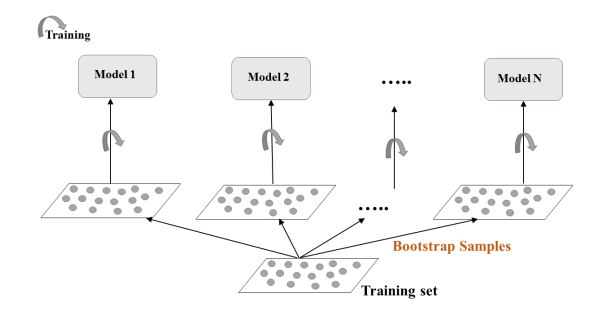

#### Bagging: Prediction

- When a new instance is fed to the different models forming the bagging ensemble, 
- Each model outputs its prediction. 
- The meta model collects these predictions and outputs a final prediction depending on the nature of the problem. 

#### Bagging: Classification & Regression

**In classification:**
- Aggregate prediction is obtained by **majority voting.** 
- The corresponding classifier in scikit-learn is BaggingClassifier. 

**In regression**

- Aggregate prediction is obtained by **averaging** the predictions made by the individual models forming the ensemble. 
- The corresponding regressor in scikit-learn is BaggingRegressor. 

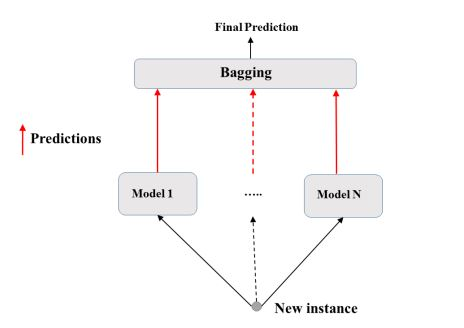

In [27]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=SEED)


In [28]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, 
                            min_samples_leaf=0.16, 
                            random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(estimator=dt, 
                       n_estimators=300, #consists of 300 classification trees dt
                       n_jobs=-1)#So that all CPU cores are used in computation

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.942


If we use the classification tree dt, which is the base estimator here, to the same training set 
- would lead to a test set accuracy of 88.9%. The result highlights how bagging **outperforms** the base estimator dt.

## `B-` Out of Bag Evaluation

- In Bagging some instances may be sampled several times for one model,
- Other instances may not be sampled at all
- On average, for each model, **63%** of the training instances are sampled.
- The remaining **37%** constitute the OOB instances
- Since OOB instances are not seen by a model during training (will be used for test)
- OOB instances can be used to estimate the performance of the ensemble without the need for cross-validation. 

This technique is known as OOB-evaluation.

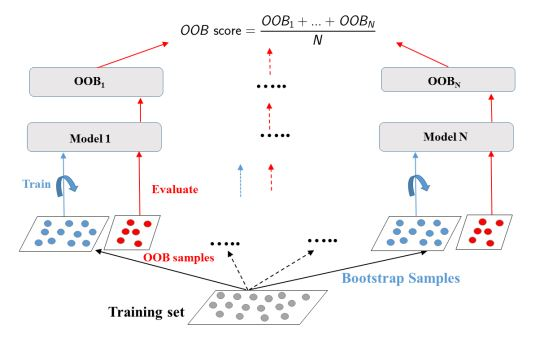

- Here, for each model, the bootstrap instances are shown in blue while the OOB-instances are shown in red. 
- Each of the N models constituting the ensemble is then trained on its corresponding bootstrap samples and evaluated on the OOB instances. 
- This leads to the obtainment of N OOB scores labeled OOB1 to OOBN. 
- The OOB-score of the bagging ensemble is evaluated as the average of these N OOB scores as shown by the formula on top. 

In [29]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=SEED)

In [30]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, 
                            min_samples_leaf=0.16, 
                            random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(estimator=dt, 
                       n_estimators=300, #consists of 300 classification trees dt
                       oob_score= True, #in order to evaluate the OOB-accuracy of bc after training
                       n_jobs=-1)#So that all CPU cores are used in computation

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate t test-set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_

print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

Accuracy of Bagging Classifier: 0.942
OOB accuracy: 0.925


The two obtained accuracies are pretty close though not exactly equal. 

These results highlight how OOB-evaluation can be an efficient technique to obtain a performance estimate of a bagged-ensemble on unseen data without performing cross-validation. 

## `C-` Random Forests (RF)

- In bagging the base estimator could be any model including a **decision tree**, **logistic regression** or even a **neural network**. 
- Each estimator is trained on a distinct bootstrap sample drawn from the training set 
- Estimators use all features for training and prediction

#### Further Diversity with Random Forests
- Random Forests is an ensemble method that uses a decision tree as a base estimator.
- Each estimator is trained on a different bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees
- When each tree is trained, only (d) features are sampled at each node without replacement *(d < total number of features)*


#### Random Forests: Training
The diagram here shows the training procedure for random forests.
- Notice how each tree forming the ensemble is trained on a different bootstrap sample from the training set. 
- In addition, when a tree is trained, at each node, only (d) features are sampled from all features without replacement. 
- The node is then split using the sampled feature that maximizes information gain
    - Insteat of selecting trained rows from all features
    - It select the sample of whole d features (d < from number of features)
- In scikit-learn (d) default value is the square-root of the number of features. For example, if there are 100 features, only 10 features are sampled at each node.

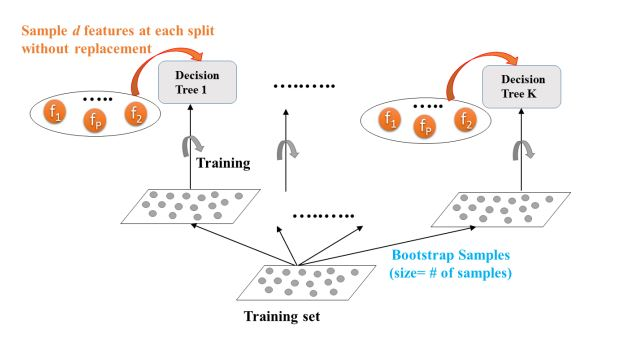

#### Random Forests: Prediction

Once trained, predictions can be made on new instances. 
- When a new instance is fed to the different base estimators, 
- each of them outputs a prediction. 
- The predictions are then collected by the random forests meta-classifier and a final prediction is made depending on the nature of the problem. 

#### Random Forests: Classification & Regression

**In classification:**
- Aggregate prediction is obtained by **majority voting.** 
- The corresponding classifier in scikit-learn is RandomForestClassifier. 

**In regression**

- Aggregate prediction is obtained by **averaging** of all the labels predicted by the base estimators. 
- The corresponding regressor in scikit-learn is RandomForestRegressor. 

 In general, Random Forests achieves a lower variance than individual trees. 

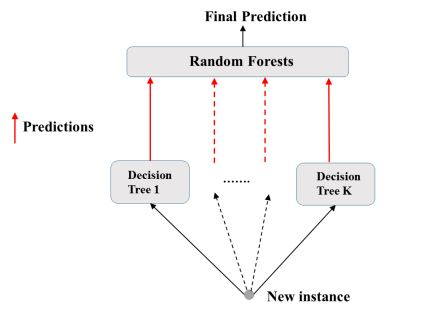

In [31]:
X = auto.drop(['mpg', 'origin'], axis = 1)
y = auto['mpg']

In [32]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=SEED)

In [33]:
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400,
                           min_samples_leaf=0.12,
                           random_state=SEED)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 3.98


This error is smaller than that achieved by a single regression tree which is 4.43. 

#### Feature Importance

- When a tree based method is trained, the predictive power of a feature (weighted average) or its importance can be assessed. 
- In scikit-learn, feature importance is assessed by measuring how much the tree nodes use a particular feature to reduce impurity. 

**Note:** 
- The importance of a feature is expressed as a percentage indicating the weight of that feature in training and prediction. 
- Once you train a tree-based model in scikit-learn, the features importances can be accessed by extracting the `feature_importance_` attribute from the model. 

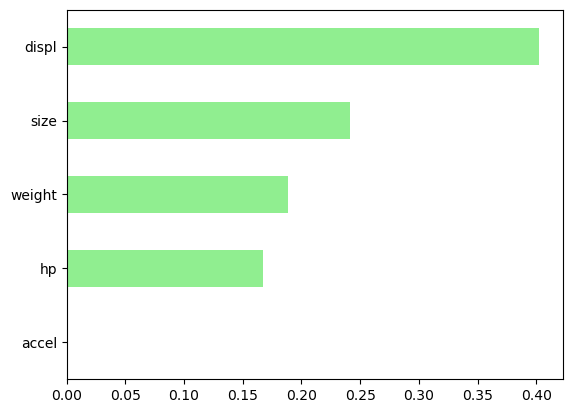

In [34]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); 
plt.show()

# Chapter 4- Boosting

## `A-` AdaBoost

**Boosting** refers to an ensemble method in which many predictors are trained and each predictor learns from the errors of its predecessor. 

- **Boosting:** It's an ensemble method combining several weak learners to form a strong learner.
- **Weak learner:** Model doing slightly better than random guessing
    - Example of weak learner: Decision stump (CART whose maximum depth is 1)

In Boosting predictors are trained sequentially and each predictor tries to correct the errors made by its predecessor. We will learn about tow methods
- AdaBoost  
- Gradient Boosting

#### AdaBoost

- Stands for Adaptive Boosting.
- Each predictor pays more attention to the instances wrongly predicted by its predecessor 
- Achieved by constantly changing the weights of training instances. 
- Furthermore, each predictor is assigned a coefficient alpha (contribute in the ensemble's final prediction). 
- Alpha depends on the predictor's training error. 

As shown in the diagram, there are N predictors in total. 
- First, predictor1 is trained on the initial dataset (X,y), and the training error for predictor1 is determined. 
- This error can then be used to determine $\alpha 1$ which is predictor1's coefficient. 
- $\alpha 1$ is then used to determine the weights W(2) of the training instances for predictor2. 
- Notice how the incorrectly predicted instances shown in green acquire higher weights. 
- When the weighted instances are used to train predictor2, this predictor is forced to pay more attention to the incorrectly predicted instances. 
- This process is repeated sequentially, until the N predictors forming the ensemble are trained. 

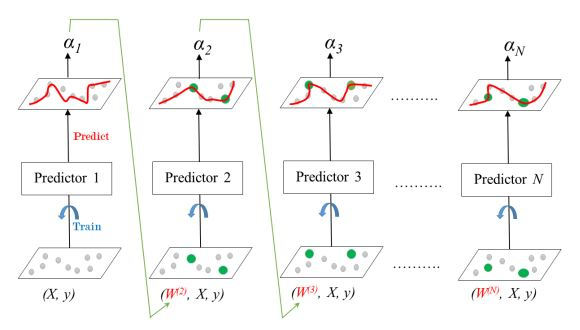

#### Learning Rate

An important parameter used in training is the learning rate, $\eta $. 
- $\eta $ is a number between 0 and 1; 
- it is used to shrink the coefficient $\alpha $ of a trained predictor. 
- It's important to note that there's a trade-off between $\eta$ and the number of estimators. 
- A smaller value of eta should be compensated by a greater number of estimators. 

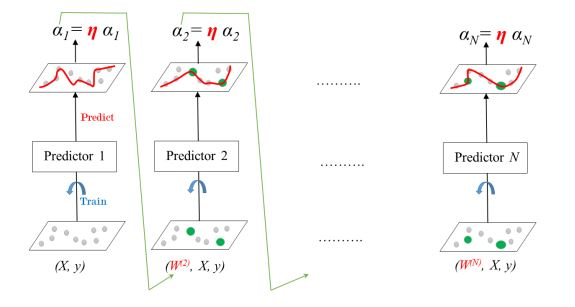

#### AdaBoost: Prediction
Once all the predictors in the ensemble are trained, the label of a new instance can be predicted depending on the nature of the problem.

**In classification:**

    Aggregate prediction is obtained by majority voting.
    The corresponding classifier in scikit-learn is AdaBoostClassifier.

**In regression**

    Aggregate prediction is obtained by averaging of all the labels predicted by the base estimators.
    The corresponding regressor in scikit-learn is AdaBoostRegressor .

It's important to note that individual predictors need not to be CARTs. However CARTs are used most of the time in boosting because of their high variance.

#### AdaBoost Classification in sklearn (Breast Cancer Dataset)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [36]:
X = df.drop(['id', 'diagnosis'], axis = 1)
y = df['diagnosis']

In [37]:
# Import models and utility functions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=SEED)

In [38]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)

# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(estimator=dt, n_estimators=100)

# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)

# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

# Print adb_clf_roc_auc_score
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

C:\Users\AHamdan\anaconda3\envs\fatma\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ROC AUC score: 0.99


## `B-` Gradient Boosting (GB)

Gradient Boosting is a popular boosting algorithm that has a proven track record of winning many machine learning competitions. 

**Gradient Boosted Trees**
- Sequential correction of predecessor's errors.
- In contrast to AdaBoost, the weights of the training instances are not tweaked.
- Instead, each predictor is trained using the residual errors of its predecessor as labels.
- Gradient Boosted Trees: a CART is used as a base learner

Take a look at the diagram here. 
- The ensemble consists of N trees. 
- Tree1 is trained using the features matrix X and the dataset labels y. 
- The predictions labeled $y_1$^ are used to determine the training set residual errors $r_1$. 
- Tree2 is then trained using the features matrix X and the residual errors $r_1$ of Tree1 as labels. 
- The predicted residuals $r_1$^  are then used to determine the residuals of residuals which are labeled $r_2$. 

This process is repeated until all of the N trees forming the ensemble are trained. 

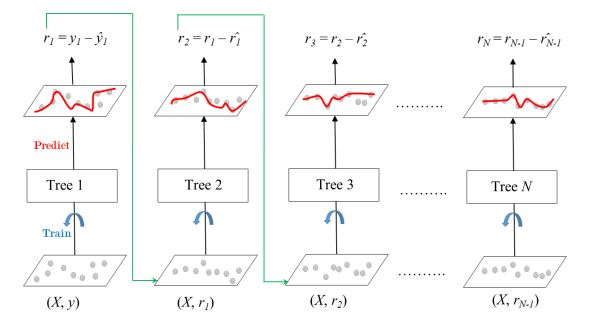

#### Shrinkage

An important parameter used in training gradient boosted trees is shrinkage. 
- Shrinkage refers to the prediction of each tree in the ensemble is shrinked after it is multiplied by a learning rate $\eta $ which is a number between 0 and 1. 
- Similarly to AdaBoost, there's a trade-off between eta and the number of estimators. 
    - Decreasing the learning rate needs to be compensated by increasing the number of estimators in order for the ensemble to reach a certain performance. 

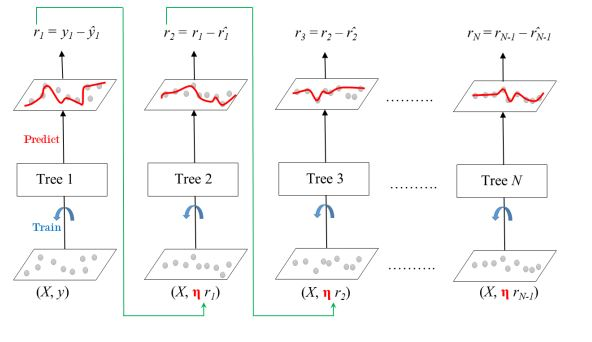

#### Gradient Boosted Trees: Prediction

Once all trees in the ensemble are trained, prediction can be made. 

**In classification:**

  - Aggregate prediction is obtained by majority voting.
  - The corresponding classifier in scikit-learn is GradientBoostingClassifier.

**In regression**

  - When a new instance is available, each tree predicts a label and the final ensemble prediction is given by the formula.
$$ y-pred = y1 + \eta r1 +  \eta r2 + ..... +  \eta rn$$

  - The corresponding regressor in scikit-learn is GradientBoostingRegressor .
  - Though not discussed in this course, a similar algorithm is used for classification problems. 



#### Gradient Boosting in sklearn (auto dataset)

In [39]:
X = auto.drop(['mpg', 'origin'], axis = 1)
y = auto['mpg']

In [40]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)


In [41]:
# Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)

# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = gbt.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 4.08


## `C-` Stochastic Gradient Boosting (SGB)

#### Gradient Boosting: Cons
- Gradient boosting involves an exhaustive search procedure. 
- Each tree in the ensemble is trained to find the best split-points and the best features. 
- This procedure may lead to CARTs that use the same split-points and possibly the same features. 

To mitigate these effects, you can use an algorithm known as **stochastic gradient boosting**

#### Stochastic Gradient Boosting

- Each CART is trained on a random subset of the training data. 
- This subset (40% - 80% of training set) is sampled without replacement. 
- Furthermore, at the level of each node, **features** are sampled without replacement when choosing the best split-points. 
- As a result, this creates further diversity in the ensemble 
- The net effect is adding more variance to the ensemble of trees. 

adding Random Forest technique

#### Stochastic Gradient Boosting: Training

Let's take a closer look at the training procedure used in stochastic gradient boosting by examining the diagram below.

- First, instead of providing all the training instances to a tree, only a fraction of these instances are provided through sampling without replacement. 
- The sampled data is then used for training a tree. However, not all features are considered when a split is made. 
- Instead, only a certain randomly sampled fraction of these features are used for this purpose. 
- Once a tree is trained, predictions are made and the residual errors can be computed. 
- These residual errors are multiplied by the learning rate eta and are fed to the next tree in the ensemble. 
- This procedure is repeated sequentially until all the trees in the ensemble are trained. 

The prediction procedure for a new instance in stochastic gradient boosting is similar to that of gradient boosting. 

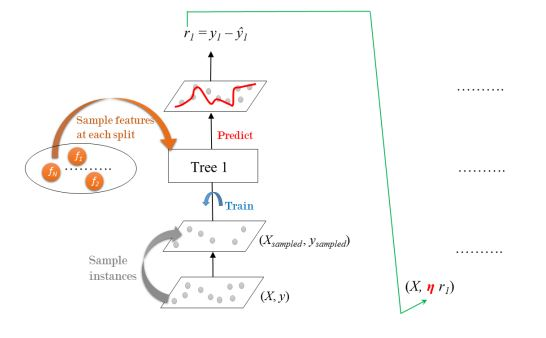

#### Stochastic Gradient Boosting in sklearn (auto dataset)

In [42]:
X = auto.drop(['mpg', 'origin'], axis = 1)
y = auto['mpg']

In [43]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)


In [44]:
# Instantiate a stochastic GradientBoostingRegressor 'sgbt'
sgbt = GradientBoostingRegressor(max_depth=1,
                                 subsample=0.8,# in order for each tree to sample 80% of the data for training
                                 max_features=0.2,# each tree uses 20% of available features to perform the best-split
                                 n_estimators=300,
                                 random_state=SEED)

# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = sgbt.predict(X_test)

# Evaluate test set RMSE 'rmse_test'
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print 'rmse_test'
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 4.28


# Chapter 5-  Model Tuning

## `A-` Tuning a CART's Hyperparameters

To obtain a better performance, the hyperparameters of a machine learning should be tuned. 

Machine learning models are characterized by 

**1-Parameters** 
- Parameters are learned from data through training; 
- Examples of parameters include the split-feature and the split-point of a node in a CART. 

**2-Hyperparameters**
- Hyperparameters are not learned from data; they should be set prior to training. 
- Examples of hyperparameters include the maximum-depth and the splitting-criterion of a CART. 

#### What is hyperparameter tuning?

- **Problem** searching for the set of optimal hyperparameters for the learning algorithm. 
- **Solution**  finding the set of optimal hyperparameters yielding an optimal model. 
- **Optimal model** yields an optimal score. 
- **Score** in sklearn, it defaults to accuracy for (classifiers) and r-squared for (regressors). 
- A model's generalization performance is evaluated using **cross-validation**. 

#### Why tune hyperparameters?

- In scikit-learn, a model's default hyperparameters are not optimal for all problems. 
- Hyperparameters should be tuned to obtain the best model performance

#### Approaches to hyperparameter tuning
- Grid Search
- Random Search
- Bayesian Optimization
- Genetic Algorithms
- ....

We will foucs in **Grid Search**

#### Grid search cross validation
- Manually set a grid of discrete hyperparameter values.
- Set a metric for scoring model performance.
- Search exhaustively through the grid.
- For each set of hyperparameters, evaluate each model's CV score.
- The optimal hyperparameters are those of the model achieving the best CV score.

**Note:** grid-search suffers from the curse of dimensionality, the bigger the grid, the longer it takes to find the solution.

#### Grid search cross validation: example

Let's walk through a concrete example to understand this procedure. Consider the case of a CART where you search through the two-dimensional hyperparameter grid shown here.

- Hyperparameters grids:
    - max_depth = {2,3,4},
    - min_samples_leaf = {0.05, 0.1}
- hyperparameter space = { (2,0.05) , (2,0.1) , (3,0.05), (3,0,0.1) , (4,0.05) , (4,0.1)  }
- CV scores = { score of (2,0.05) , ... , score of (4,0.1) }
- Optimal hyperparameters = set of hyperparameters corresponding to the best CV score

#### Inspecting the hyperparameters of a CART in sklearn

In [45]:
X = df.drop(['id','diagnosis'], axis =1)
y = df['diagnosis']

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)

In [46]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Set seed to 1 for reproducibility
SEED = 1

# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=SEED)


In [47]:
# Print out 'dt's hyperparameters
#This prints out a dictionary where the keys are the hyperparameter names.
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 1,
 'splitter': 'best'}

In [48]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters 'params_dt'
params_dt = {'max_depth': [3, 4,5, 6],
            'min_samples_leaf': [0.04, 0.06, 0.08],
            'max_features': [0.2, 0.4,0.6, 0.8]
            }

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='accuracy',
                       cv=10,
                       n_jobs=-1)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='accuracy')

In [49]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy:{:.03}'.format(best_CV_score))

Best hyerparameters:
 {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.04}
Best CV accuracy:0.937


- Similarly, the best-model can be extracted using the `best_estimator_` attribute. 
- Note that this model is fitted on the whole training set because the refit parameter of GridSearchCV is set to True by default. 
- Finally, you can evaluate this model's test set accuracy using the score method.

In [50]:
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)

# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.889


 The result is about 94.7% while the score of an untuned CART is of 93%.  ??????????????

## `B-` Tuning a RF's Hyperparameters

#### Random Forests Hyperparameters

- In addition to the hyperparameters of the CARTs forming random forest 
- The ensemble itself is characterized by other hyperparameters such as 
    - the number of estimators, 
    - whether it uses bootstraping or not 
    - and so on. 

#### Tuning is expensive
Hyperparameter tuning:
- Computationally expensive.
- Sometimes leads to very slight improvement.

For this reason, it is desired to weigh the impact of tuning on the pipeline of your data analysis project as a whole in order to understand if it is worth pursuing. 

### Inspecting RF Hyperparameters in sklearn

In [51]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Set seed for reproducibility
SEED = 1

# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state= SEED)

In [52]:
# Inspect rf' s hyperparameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [53]:
X = auto.drop(['mpg', 'origin'], axis = 1)
y = auto['mpg']

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=SEED)

In [54]:
# Basic imports
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
# Define a grid of hyperparameter 'params_rf'
params_rf = {'n_estimators': [300, 400, 500],
             'max_depth': [4, 6, 8],
             'min_samples_leaf': [0.1, 0.2],
             'max_features': ['log2','sqrt']
            }
# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=3, #to perform 3-fold cross-validation
                       scoring='neg_mean_squared_error',# in order to use negative mean squared error as a metric. 
                       verbose=1,#verbose controls verbosity; the higher its value, the more messages are printed during fitting. 
                       n_jobs=-1)


In [55]:
# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [56]:
# Extract the best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 300}


In [57]:
# Extract the best model from 'grid_rf'
best_model = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 3.92


If you would have trained an untuned model, the RMSE would be 3.98. 